Luis Pedro Pérez
22008067

# Laboratorio #1

### 1.

True

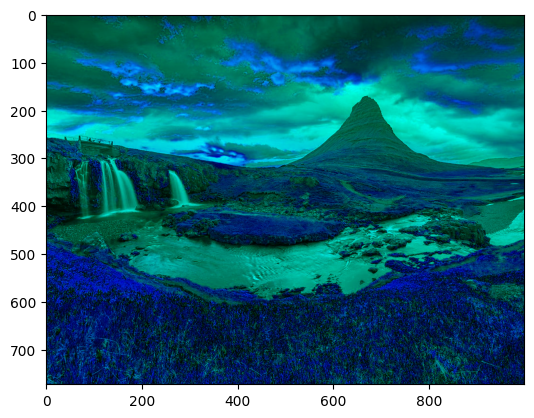

In [11]:
import cv2
import numpy as np

def imagen_canales(imagen, color):
    # Se verifica que el parámetro de color esté en entre el listado (1, 2, 3, 10, 20, o 30)
    if color not in [1, 2, 3, 10, 20, 30]:
        raise ValueError("El parámetro 'color' debe ser 1, 2, 3, 10, 20 o 30.")

    # Convertir imagen a modo RGB
    imagen_rgb = cv2.cvtColor(imagen, cv2.COLOR_BGR2RGB)

    # Se crea una nueva variable con las dimensiones de la imagen original donde se depositarán los nuevos pixeles
    imagen_activa_canales = np.zeros_like(imagen_rgb)

    # Se establece la selección de los canales a utilizar con base a lo requerido por el usuario
    if color == 1:  # Mostrar solo azul
        imagen_activa_canales[:, :, 0] = imagen_rgb[:, :, 2]
    elif color == 2:  # Mostrar solo verde
        imagen_activa_canales[:, :, 1] = imagen_rgb[:, :, 1]
    elif color == 3:  # Mostrar solo rojo
        imagen_activa_canales[:, :, 2] = imagen_rgb[:, :, 0]
    elif color == 10:  # Mostrar rojo y verde
        imagen_activa_canales[:, :, [1,2]] = imagen_rgb[:, :, [1,0]]
    elif color == 20:  # Mostrar verde y azul
        imagen_activa_canales[:, :, [0, 1]] = imagen_rgb[:, :, [1, 2]]
    elif color == 30:  # Mostrar azul y rojo
        imagen_activa_canales[:, :, [0, 2]] = imagen_rgb[:, :, [2, 0]]

    return imagen_activa_canales

import matplotlib.pyplot as plt
# Se importa la imagen a utilizar
imagen = cv2.imread("Iceland.jpg")

# Se seleccionan los canales a visualizar
imagen_canales= imagen_canales(imagen, 20)
plt.imshow(cv2.cvtColor(imagen_canales, cv2.COLOR_BGR2RGB))
plt.show

# Se exporta la imagen modificada
cv2.imwrite("imagen_mod.jpg", imagen_canales)


### 2.

False

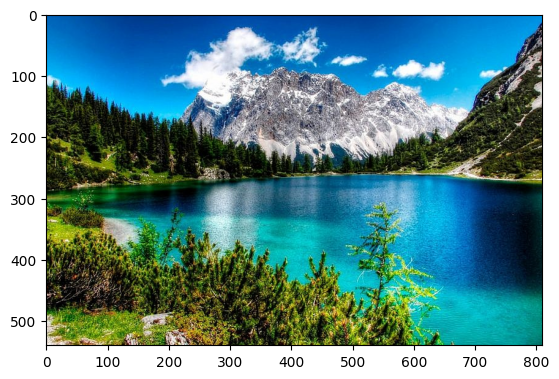

In [33]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def imagen_color(img_ro, img_ve, img_az):
    
    # Asegurarse de que las imágenes de los canales tengan las mismas dimensiones
    if imagen_ro.shape != imagen_ve.shape or imagen_ro.shape != imagen_az.shape:
        raise ValueError("Las dimensiones de las imágenes deben ser las mismas.")
    
    # Se extraen las dimensiones de la imagen a procesar
    filas = imagen_ro.shape[0]
    columnas = imagen_ro.shape[1]
    
    # Se crea una nueva variable con las dimensiones de la imagen original donde se depositarán los nuevos pixeles
    imagen_color = np.zeros((filas, columnas, 3), dtype=np.uint8)

    # Se combinan los canales para asignar los colores
    imagen_color[:, :, 0] = img_az  # Canal azul
    imagen_color[:, :, 1] = img_ve  # Canal verde
    imagen_color[:, :, 2] = img_ro  # Canal rojo

    return imagen_color


# Se importan las imagenes a utilizar
imagen_ro = cv2.imread("Lab1/imagen1/imagen1_salida_gray_rojo.jpg", cv2.IMREAD_GRAYSCALE)
imagen_ve = cv2.imread("Lab1/imagen1/imagen1_salida_gray_verde.jpg", cv2.IMREAD_GRAYSCALE)
imagen_az = cv2.imread("Lab1/imagen1/imagen1_salida_gray_azul.jpg", cv2.IMREAD_GRAYSCALE)

# Se llama la función a utilizar
imagen_full = imagen_color(imagen_ro, imagen_ve, imagen_az)

# Se realiza el cambio de BGR a RGB
plt.imshow(cv2.cvtColor(imagen_full, cv2.COLOR_BGR2RGB))
plt.show

# Se exporta la imagen modificada
cv2.imwrite("/Lab1/imagen1/imagen_color.jpg", imagen_full)

### 3.

In [36]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def img_canales_g(imagen):
    # Se lee la imagen a procesar en escala de grises
    img_g = cv2.imread(imagen, cv2.IMREAD_GRAYSCALE)

    # Se extraen las dimensiones de la imagen a procesar
    filas = img_g.shape[0]
    columnas = img_g.shape[1]
    
    # Se crea una nueva variable con las dimensiones de la imagen original donde se depositarán los nuevos pixeles
    imagen_can = np.zeros((filas, columnas, 3), dtype=np.uint8)

    # Se replica con los canales separados
    imagen_can[:, :, 0] = img_g # Canal Azul
    imagen_can[:, :, 1] = img_g # Canal Verde
    imagen_can[:, :, 2] = img_g # Canal Rojo

    # Creación de imágenes por canales
    img_az = imagen_can[:, :, 0] # Canal Azul
    img_ve = imagen_can[:, :, 1] # Canal Verde
    img_ro = imagen_can[:, :, 2] # Canal Rojo

    return img_ro, img_ve, img_az

# Imagen a procesar
imagen_g = "lauterbrunnen-suiza-t.jpg"

img_rojo, img_verde, img_azul = img_canales_g(imagen_g)

cv2.imshow("canal Rojo", img_rojo)

: 